Приведем подробные инструкции для решения поставленной задачи.

Сначала обновим и установим необходимые модули.

In [45]:
!pip install --upgrade pip
!pip install imutils
!pip install opencv-python
!pip install --upgrade scikit-learn==0.23.0

  Using cached pip-22.0.4-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 21.2.4
    Uninstalling pip-21.2.4:


ERROR: Could not install packages due to an OSError: [WinError 5] Отказано в доступе: 'c:\\programdata\\anaconda3\\lib\\site-packages\\pip\\py.typed'
Consider using the `--user` option or check the permissions.



  Using cached scikit-learn-0.23.0.tar.gz (7.2 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
Failed to build scikit-learn


  ERROR: Command errored out with exit status 1:
   command: 'C:\ProgramData\Anaconda3\python.exe' 'C:\ProgramData\Anaconda3\lib\site-packages\pip\_vendor\pep517\in_process\_in_process.py' build_wheel 'C:\Users\D899~1\AppData\Local\Temp\tmpv0jq1ywx'
       cwd: C:\Users\Сергей\AppData\Local\Temp\pip-install-1j_068qv\scikit-learn_872429db0bac4314ab79e4081bf4abb1
  Complete output (2046 lines):
  Error in sitecustomize; set PYTHONVERBOSE for traceback:
  SyntaxError: (unicode error) 'utf-8' codec can't decode byte 0xd1 in position 0: invalid continuation byte (sitecustomize.py, line 21)
  Partial import of sklearn during the build process.
  No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  C:\Program Files\Microsoft Visual Studio\2022\Community\VC\Tools\MSVC\14.31.31103\bin\HostX86\x64\cl.exe /c /nologo /Ox /W3 /GL /DNDEBUG /MD -IC:\Program Files\Microsoft Visual Studio\2022\Community\VC\Tools\MSVC\14.31.31103\ATLMFC\include -IC:\Program Files\M

Подключение базовых библиотек для обработки изображений

In [46]:
from IPython.display import Image
from imutils import paths
import numpy as np
import cv2
import os


  building 'sklearn.metrics._pairwise_fast' extension
  compiling C sources
  C:\Program Files\Microsoft Visual Studio\2022\Community\VC\Tools\MSVC\14.31.31103\bin\HostX86\x64\cl.exe /c /nologo /Ox /W3 /GL /DNDEBUG /MD -IC:\ProgramData\Anaconda3\lib\site-packages\numpy\core\include -Ibuild\src.win-amd64-3.9\numpy\distutils\include -IC:\ProgramData\Anaconda3\include -IC:\ProgramData\Anaconda3\include -IC:\Program Files\Microsoft Visual Studio\2022\Community\VC\Tools\MSVC\14.31.31103\ATLMFC\include -IC:\Program Files\Microsoft Visual Studio\2022\Community\VC\Tools\MSVC\14.31.31103\include -IC:\Program Files (x86)\Windows Kits\NETFXSDK\4.8\include\um -IC:\Program Files (x86)\Windows Kits\10\include\10.0.19041.0\ucrt -IC:\Program Files (x86)\Windows Kits\10\\include\10.0.19041.0\\shared -IC:\Program Files (x86)\Windows Kits\10\\include\10.0.19041.0\\um -IC:\Program Files (x86)\Windows Kits\10\\include\10.0.19041.0\\winrt -IC:\Program Files (x86)\Windows Kits\10\\include\10.0.19041.0\\cppw

Для работы с изображениями, найдем их гистограммы — характеристики распределения интенсивности изображения. Для этого можно воспользоваться следующим методом.

In [47]:
def extract_histogram(image, bins=(8, 8, 8)):
    hist = cv2.calcHist([image], [0, 1, 2], None, bins, [0, 256, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()

  copying build\lib.win-amd64-3.9\sklearn\feature_selection\variance_threshold.py -> build\bdist.win-amd64\wheel\.\sklearn\feature_selection
  copying build\lib.win-amd64-3.9\sklearn\feature_selection\_base.py -> build\bdist.win-amd64\wheel\.\sklearn\feature_selection
  copying build\lib.win-amd64-3.9\sklearn\feature_selection\_from_model.py -> build\bdist.win-amd64\wheel\.\sklearn\feature_selection
  copying build\lib.win-amd64-3.9\sklearn\feature_selection\_mutual_info.py -> build\bdist.win-amd64\wheel\.\sklearn\feature_selection
  copying build\lib.win-amd64-3.9\sklearn\feature_selection\_rfe.py -> build\bdist.win-amd64\wheel\.\sklearn\feature_selection
  copying build\lib.win-amd64-3.9\sklearn\feature_selection\_univariate_selection.py -> build\bdist.win-amd64\wheel\.\sklearn\feature_selection
  copying build\lib.win-amd64-3.9\sklearn\feature_selection\_variance_threshold.py -> build\bdist.win-amd64\wheel\.\sklearn\feature_selection
  copying build\lib.win-amd64-3.9\sklearn\feature

Считаем изображения из корневой папки train и вычислим гистограмму каждого изображения. Кроме того, отделим метку каждого изображения. Обработка большого числа изображений в облачных сервисах занимает длительное время (1-5 минут).

In [48]:
imagePaths = sorted(list(paths.list_images('train')))
trainData = []
labels = []

for (i, imagePath) in enumerate(imagePaths):
    image = cv2.imread(imagePath, 1)
    label = imagePath.split(os.path.sep)[-1].split(".")[0]
    hist = extract_histogram(image)
    trainData.append(hist)
    labels.append(label)

  copying build\lib.win-amd64-3.9\sklearn\utils\murmurhash.cp39-win_amd64.pyd -> build\bdist.win-amd64\wheel\.\sklearn\utils
  copying build\lib.win-amd64-3.9\sklearn\utils\murmurhash.pxd -> build\bdist.win-amd64\wheel\.\sklearn\utils
  copying build\lib.win-amd64-3.9\sklearn\utils\optimize.py -> build\bdist.win-amd64\wheel\.\sklearn\utils
  copying build\lib.win-amd64-3.9\sklearn\utils\random.py -> build\bdist.win-amd64\wheel\.\sklearn\utils
  copying build\lib.win-amd64-3.9\sklearn\utils\seq_dataset.py -> build\bdist.win-amd64\wheel\.\sklearn\utils
  copying build\lib.win-amd64-3.9\sklearn\utils\setup.py -> build\bdist.win-amd64\wheel\.\sklearn\utils
  copying build\lib.win-amd64-3.9\sklearn\utils\sparsefuncs.py -> build\bdist.win-amd64\wheel\.\sklearn\utils
  copying build\lib.win-amd64-3.9\sklearn\utils\sparsefuncs_fast.cp39-win_amd64.pyd -> build\bdist.win-amd64\wheel\.\sklearn\utils
  copying build\lib.win-amd64-3.9\sklearn\utils\stats.py -> build\bdist.win-amd64\wheel\.\sklearn\

Преобразуем метки в удобный формат 0 и 1. Cat заменяем на 1, Dog на 0.

In [49]:
Y = [1 if x == 'cat' else 0 for x in labels]

1


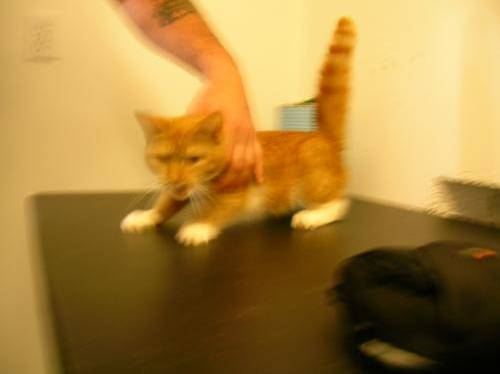

In [50]:
print(Y[0])
Image(filename=imagePaths[0])

Видно, что классом 1 у нас занумерованы коты (кошки).

Обучаем первый базовый классификатор - бэггинг деревьев принятия решений

In [51]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy', #критерий разделения
                              min_samples_leaf=10, #минимальное число объектов в листе
                              max_leaf_nodes=20, #максимальное число листьев
                              random_state=414)
bagging = BaggingClassifier(tree, #базовый алгоритм
                            n_estimators=20, #количество деревьев
                            random_state=414)
bagging.fit(trainData, Y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_leaf_nodes=20,
                                                        min_samples_leaf=10,
                                                        random_state=414),
                  n_estimators=20, random_state=414)

Теперь обучим модель почти-разделяющий гиперплосоксти.

In [52]:
from sklearn.svm import LinearSVC

svm = LinearSVC(random_state = 414, C = 1.64)
svm.fit(trainData, Y)

LinearSVC(C=1.64, random_state=414)

И наконец обучаем третий базовый алгоритм — случайный лес

In [53]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=20, #количество деревьев
                             criterion='entropy', #критерий разделения
                              min_samples_leaf=10, #минимальное число объектов в листе
                              max_leaf_nodes=20, #максимальное число листьев
                              random_state=414)
forest.fit(trainData, Y)

RandomForestClassifier(criterion='entropy', max_leaf_nodes=20,
                       min_samples_leaf=10, n_estimators=20, random_state=414)

Задаем в качестве решающего метаалгоритма логистическую регрессию:

In [54]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='lbfgs', random_state=414)

Обучаем метаалгоритм

In [55]:
from sklearn.ensemble import StackingClassifier

base_estimators = [('SVM', svm), ('Bagging DT', bagging), ('DecisionForest', forest)]
sclf = StackingClassifier(estimators=base_estimators, final_estimator=lr, cv=2)
sclf.fit(trainData, Y)

StackingClassifier(cv=2,
                   estimators=[('SVM', LinearSVC(C=1.64, random_state=414)),
                               ('Bagging DT',
                                BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                                        max_leaf_nodes=20,
                                                                                        min_samples_leaf=10,
                                                                                        random_state=414),
                                                  n_estimators=20,
                                                  random_state=414)),
                               ('DecisionForest',
                                RandomForestClassifier(criterion='entropy',
                                                       max_leaf_nodes=20,
                                                       min_samples_leaf=10,
       

Оценка метамодели. Доля правильной классификации (Accuracy):

In [56]:
sclf.score(trainData, Y)

0.849

Вычислим предсказания для объекта из папки test

In [65]:
singleImage = cv2.imread('test/cat.1042.jpg')
histt = extract_histogram(singleImage)
histt2 = histt.reshape(1, -1)
prediction = sclf.predict(histt2)

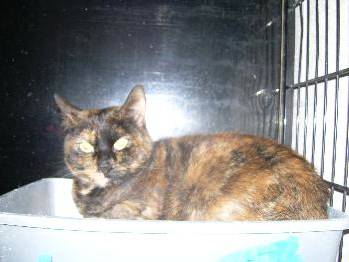

In [66]:
Image(filename='test/cat.1042.jpg')

In [67]:
prediction

array([0])

In [68]:
sclf.predict_proba(histt2)

array([[0.58748282, 0.41251718]])

Видно, что построенный классификатор успешно справился с заданием.